In [1]:
#!/usr/bin/env python3

# author: Michael A. Perlin (github.com/perlinm)

import itertools, numpy, qiskit
import circuit_cutter
import mlrecon_methods as ml

import numpy as np
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile

from qiskit.transpiler import PassManager

from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer, plot_histogram
from qiskit.compiler import assemble
from qiskit.tools.monitor import job_monitor

# The pulse simulator
from qiskit.providers.aer import PulseSimulator

from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise import NoiseModel

In [2]:
numpy.set_printoptions(linewidth = 200)

shots = 8192 * 24

qubits = 6

# # should be "GHZ", "cascade", "dense", or "clustered"
# circuit_type = "GHZ"
# layers = 1 # number of gate layers

# qubits = 6 # number of qubits
# frag_num = 2 # number of fragments

simulation_backend = "qasm_simulator"

seed = 0
print_circuits = True

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='chm185')
provider.backends()

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/quantum/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-ornl', group='ornl', project='chm185')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-ornl', group='ornl', project='chm185')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-ornl', group='ornl', project='chm185')>,
 <IBMQBackend('ibmq_kolkata') from IBMQ(hub='ibm-q-ornl', group='ornl', project='chm185')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-ornl', group='ornl', project='chm185')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-ornl', group='ornl', project='chm185')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-ornl', group='ornl', project='chm185')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-ornl', group='ornl', project='chm185')>,
 <IBMQBackend('ibmq_guadalupe') from IBMQ(hub='ibm-q-ornl', group='ornl', project='chm185')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-ornl', group='ornl', project='chm185')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q-ornl', grou

In [4]:
device = provider.get_backend('ibmq_manila')
device

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q-ornl', group='ornl', project='chm185')>

In [5]:
noisy_simulator = provider.get_backend('ibmq_qasm_simulator')

In [6]:
circuit = QuantumCircuit.from_qasm_file("qaoa5q_pauli.qasm")

In [7]:
from qiskit import IBMQ, Aer
from qiskit.providers.aer.noise import NoiseModel
noise_model = NoiseModel.from_backend(device)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'sx', 'u3', 'x']
  Instructions with noise: ['x', 'cx', 'reset', 'id', 'measure', 'sx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('sx', [0]), ('sx', [1]), ('sx', [2]), ('sx', [3]), ('sx', [4]), ('x', [0]), ('x', [1]), ('x', [2]), ('x', [3]), ('x', [4]), ('cx', [4, 3]), ('cx', [3, 4]), ('cx', [2, 3]), ('cx', [3, 2]), ('cx', [1, 2]), ('cx', [2, 1]), ('cx', [0, 1]), ('cx', [1, 0]), ('reset', [0]), ('reset', [1]), ('reset', [2]), ('reset', [3]), ('reset', [4]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]


In [8]:
help(noisy_simulator)

Help on IBMQSimulator in module qiskit.providers.ibmq.ibmqbackend object:

class IBMQSimulator(IBMQBackend)
 |  IBMQSimulator(configuration: Union[qiskit.providers.models.backendconfiguration.QasmBackendConfiguration, qiskit.providers.models.backendconfiguration.PulseBackendConfiguration], provider: 'accountprovider.AccountProvider', credentials: qiskit.providers.ibmq.credentials.credentials.Credentials, api_client: qiskit.providers.ibmq.api.clients.account.AccountClient) -> None
 |  
 |  Backend class interfacing with an IBM Quantum Experience simulator.
 |  
 |  Method resolution order:
 |      IBMQSimulator
 |      IBMQBackend
 |      qiskit.providers.basebackend.BaseBackend
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  properties(self, refresh: bool = False, datetime: Union[datetime.datetime, NoneType] = None) -> None
 |      Return ``None``, simulators do not have backend properties.
 |  
 |  run(self, qobj: Union[qiskit.qobj.qasm_qobj.QasmQobj, q

In [9]:
##########################################################################################
# build and cut a circuit
##########################################################################################

#circuit, cuts = ml.build_circuit_with_cuts(circuit_type, layers, qubits, frag_num, seed)

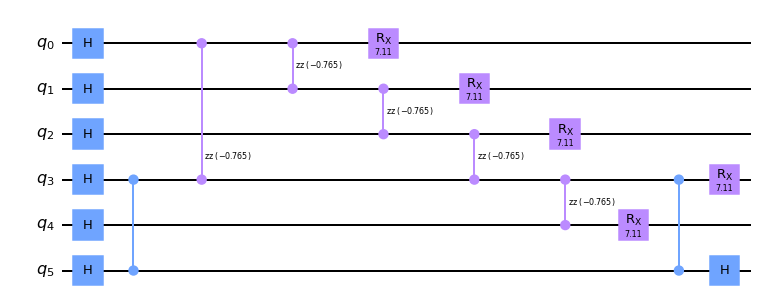

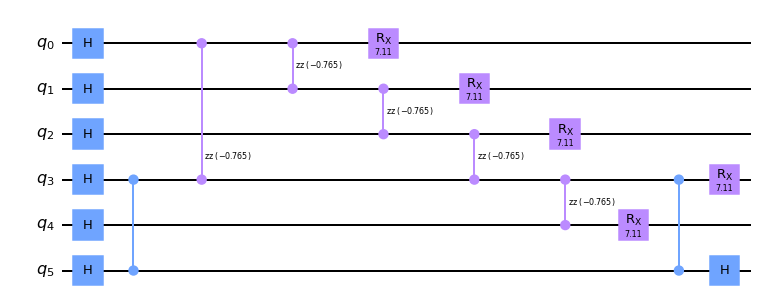

In [10]:
circuit.draw(output = 'mpl')

In [20]:
circuit.cz(0,3)

In [21]:
circuit.draw()

┌───┐                                  ┌────────────┐               »
q_0: ┤ H ├────■──────────────■──────────────┤ RX(7.1054) ├───────────────»
     ├───┤    │              │zz(-0.76459)  └────────────┘ ┌────────────┐»
q_1: ┤ H ├────┼──────────────■──────────────■──────────────┤ RX(7.1054) ├»
     ├───┤    │                             │zz(-0.76459)  └────────────┘»
q_2: ┤ H ├────┼─────────────────────────────■──────────────■─────────────»
     ├───┤    │zz(-0.76459)                                │zz(-0.76459) »
q_3: ┤ H ├─■──■────────────────────────────────────────────■─────────────»
     ├───┤ │                                                             »
q_4: ┤ H ├─┼─────────────────────────────────────────────────────────────»
     ├───┤ │                                                             »
q_5: ┤ H ├─■─────────────────────────────────────────────────────────────»
     └───┘                                                               »
«                                                      
«q_0: ───────────────────────────────────────────────■─
«                                                    │ 
«q_1: ───────────────────────────────────────────────┼─
«      ┌────────────┐                                │ 
«q_2: ─┤ RX(7.1054) ├────────────────────────────────┼─
«      └────────────┘                 ┌────────────┐ │ 
«q_3: ─■────────────────────────────■─┤ RX(7.1054) ├─■─
«      │zz(-0.76459) ┌────────────┐ │ └────────────┘   
«q_4: ─■─────────────┤ RX(7.1054) ├─┼──────────────────
«                    └────────────┘ │     ┌───┐        
«q_5: ──────────────────────────────■─────┤ H ├────────
«                                         └───┘

In [22]:
circuit.count_ops()

OrderedDict([('h', 7), ('rzz', 5), ('rx', 5), ('cz', 3)])

In [23]:
circuit.qubits[3]

Qubit(QuantumRegister(6, 'q'), 3)

In [24]:
cuts = [ (circuit.qubits[3], 1), (circuit.qubits[3], 2), (circuit.qubits[3], 5), (circuit.qubits[3], 6)]

In [25]:
print(cuts)

[(Qubit(QuantumRegister(6, 'q'), 3), 1), (Qubit(QuantumRegister(6, 'q'), 3), 2), (Qubit(QuantumRegister(6, 'q'), 3), 5), (Qubit(QuantumRegister(6, 'q'), 3), 6)]


In [26]:
fragments, wire_path_map = circuit_cutter.cut_circuit(circuit, cuts)

In [27]:
print(wire_path_map)

{Qubit(QuantumRegister(6, 'q'), 0): ((0, Qubit(QuantumRegister(6, 'q'), 1)),), Qubit(QuantumRegister(6, 'q'), 1): ((0, Qubit(QuantumRegister(6, 'q'), 2)),), Qubit(QuantumRegister(6, 'q'), 2): ((0, Qubit(QuantumRegister(6, 'q'), 4)),), Qubit(QuantumRegister(6, 'q'), 3): ((1, Qubit(QuantumRegister(1, 'q'), 0)), (2, Qubit(QuantumRegister(3, 'q'), 1)), (0, Qubit(QuantumRegister(6, 'q'), 5)), (2, Qubit(QuantumRegister(3, 'q'), 2)), (0, Qubit(QuantumRegister(6, 'q'), 3))), Qubit(QuantumRegister(6, 'q'), 4): ((0, Qubit(QuantumRegister(6, 'q'), 0)),), Qubit(QuantumRegister(6, 'q'), 5): ((2, Qubit(QuantumRegister(3, 'q'), 0)),)}


In [28]:
total_variants = ml.fragment_variants(wire_path_map)

In [29]:
if print_circuits:
    print("total circuit:")
    print(circuit)
    print("cuts:")
    for cut in cuts:
        print("",cut)
    print()
    for idx, fragment in enumerate(fragments):
        print(f"fragment {idx}:")
        print(fragment)
        print()
    fragment_cuts = ml.fragment_cuts(wire_path_map)
    print("fragment_index, prep_cuts, meas_cuts:")
    for frag_idx, frag_cuts in enumerate(fragment_cuts):
        print(frag_idx, frag_cuts["prep"], frag_cuts["meas"])
    print()
    print("total number of fragment variants:", total_variants)
    print("total number of shots:", ( shots // total_variants ) * total_variants)
    print()

total circuit:
     ┌───┐                                  ┌────────────┐               »
q_0: ┤ H ├────■──────────────■──────────────┤ RX(7.1054) ├───────────────»
     ├───┤    │              │zz(-0.76459)  └────────────┘ ┌────────────┐»
q_1: ┤ H ├────┼──────────────■──────────────■──────────────┤ RX(7.1054) ├»
     ├───┤    │                             │zz(-0.76459)  └────────────┘»
q_2: ┤ H ├────┼─────────────────────────────■──────────────■─────────────»
     ├───┤    │zz(-0.76459)                                │zz(-0.76459) »
q_3: ┤ H ├─■──■────────────────────────────────────────────■─────────────»
     ├───┤ │                                                             »
q_4: ┤ H ├─┼─────────────────────────────────────────────────────────────»
     ├───┤ │                                                             »
q_5: ┤ H ├─■─────────────────────────────────────────────────────────────»
     └───┘                                                               »
«         

In [19]:
print(fragment_cuts)

[{'prep': 1, 'meas': 1}, {'prep': 1, 'meas': 1}]


In [20]:
# list of all possible measurement outcomes (bitstrings)
all_bits = [ "".join(bits) for bits in itertools.product(["0","1"], repeat = qubits) ]

In [21]:
print(all_bits)

['000000', '000001', '000010', '000011', '000100', '000101', '000110', '000111', '001000', '001001', '001010', '001011', '001100', '001101', '001110', '001111', '010000', '010001', '010010', '010011', '010100', '010101', '010110', '010111', '011000', '011001', '011010', '011011', '011100', '011101', '011110', '011111', '100000', '100001', '100010', '100011', '100100', '100101', '100110', '100111', '101000', '101001', '101010', '101011', '101100', '101101', '101110', '101111', '110000', '110001', '110010', '110011', '110100', '110101', '110110', '110111', '111000', '111001', '111010', '111011', '111100', '111101', '111110', '111111']


In [22]:
# get the actual state / probability distribution for the full circuit
actual_state = ml.get_statevector(circuit)
actual_dist = { "".join(bits) : abs(amp)**2
                for bits, amp in zip(all_bits, actual_state)
                if amp != 0 }

# get a simulated probability distribution for the full circuit
circuit.measure_all()
full_circuit_result = ml.run_circuits(circuit, shots, backend = simulation_backend)
full_circuit_dist = {}
for part in full_circuit_result:
    for bits, counts in part.get_counts(circuit).items():
        if bits not in full_circuit_dist:
            full_circuit_dist[bits] = 0
        full_circuit_dist[bits] += counts / shots

In [23]:
circuit.draw()

┌───┐                                  ┌────────────┐               »
   q_0: ┤ H ├────■──────────────■──────────────┤ RX(7.1054) ├───────────────»
        ├───┤    │              │zz(-0.76459)  └────────────┘ ┌────────────┐»
   q_1: ┤ H ├────┼──────────────■──────────────■──────────────┤ RX(7.1054) ├»
        ├───┤    │                             │zz(-0.76459)  └────────────┘»
   q_2: ┤ H ├────┼─────────────────────────────■──────────────■─────────────»
        ├───┤    │zz(-0.76459)                                │zz(-0.76459) »
   q_3: ┤ H ├─■──■────────────────────────────────────────────■─────────────»
        ├───┤ │                                                             »
   q_4: ┤ H ├─┼─────────────────────────────────────────────────────────────»
        ├───┤ │                                                             »
   q_5: ┤ H ├─■─────────────────────────────────────────────────────────────»
        └───┘                                                               »
meas: 6/════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                       ░ ┌─┐               
«   q_0: ───────────────────────────────────────────────░─┤M├───────────────
«                                                       ░ └╥┘┌─┐            
«   q_1: ───────────────────────────────────────────────░──╫─┤M├────────────
«         ┌────────────┐                                ░  ║ └╥┘┌─┐         
«   q_2: ─┤ RX(7.1054) ├────────────────────────────────░──╫──╫─┤M├─────────
«         └────────────┘                 ┌────────────┐ ░  ║  ║ └╥┘┌─┐      
«   q_3: ─■────────────────────────────■─┤ RX(7.1054) ├─░──╫──╫──╫─┤M├──────
«         │zz(-0.76459) ┌────────────┐ │ └────────────┘ ░  ║  ║  ║ └╥┘┌─┐   
«   q_4: ─■─────────────┤ RX(7.1054) ├─┼────────────────░──╫──╫──╫──╫─┤M├───
«                       └────────────┘ │     ┌───┐      ░  ║  ║  ║  ║ └╥┘┌─┐
«   q_5: ──────────────────────────────■─────┤ H ├──────░──╫──╫──╫──╫──╫─┤M├
«                                            └───┘      ░  ║  ║  ║  ║  ║ └╥┘
«meas: 6/══════════════════════════════════════════════════╩══╩══╩══╩══╩══╩═
«                                                          0  1  2  3  4  5

In [24]:
wire_path_map

{Qubit(QuantumRegister(6, 'q'), 0): ((0, Qubit(QuantumRegister(5, 'q'), 0)),),
 Qubit(QuantumRegister(6, 'q'), 1): ((0, Qubit(QuantumRegister(5, 'q'), 1)),),
 Qubit(QuantumRegister(6, 'q'), 2): ((0, Qubit(QuantumRegister(5, 'q'), 3)),),
 Qubit(QuantumRegister(6, 'q'), 3): ((1, Qubit(QuantumRegister(3, 'q'), 1)),
  (0, Qubit(QuantumRegister(5, 'q'), 4)),
  (1, Qubit(QuantumRegister(3, 'q'), 2))),
 Qubit(QuantumRegister(6, 'q'), 4): ((0, Qubit(QuantumRegister(5, 'q'), 2)),),
 Qubit(QuantumRegister(6, 'q'), 5): ((1, Qubit(QuantumRegister(3, 'q'), 0)),)}

In [25]:
orign_qc = QuantumCircuit.from_qasm_file("QAOA5q.qasm")

In [26]:
orign_qc.draw()

┌───┐                               ┌────────────┐               »
   q_0: ┤ H ├─■──────────────■──────────────┤ RX(7.1054) ├───────────────»
        ├───┤ │              │zz(-0.76459)  └────────────┘ ┌────────────┐»
   q_1: ┤ H ├─┼──────────────■──────────────■──────────────┤ RX(7.1054) ├»
        ├───┤ │                             │zz(-0.76459)  └────────────┘»
   q_2: ┤ H ├─┼─────────────────────────────■──────────────■─────────────»
        ├───┤ │zz(-0.76459)                                │zz(-0.76459) »
   q_3: ┤ H ├─■────────────────────────────────────────────■─────────────»
        ├───┤                                                            »
   q_4: ┤ H ├────────────────────────────────────────────────────────────»
        └───┘                                                            »
meas: 5/═════════════════════════════════════════════════════════════════»
                                                                         »
«                                      ░ ┌─┐            
«   q_0: ──────────────────────────────░─┤M├────────────
«                                      ░ └╥┘┌─┐         
«   q_1: ──────────────────────────────░──╫─┤M├─────────
«         ┌────────────┐               ░  ║ └╥┘┌─┐      
«   q_2: ─┤ RX(7.1054) ├───────────────░──╫──╫─┤M├──────
«         └────────────┘┌────────────┐ ░  ║  ║ └╥┘┌─┐   
«   q_3: ─■─────────────┤ RX(7.1054) ├─░──╫──╫──╫─┤M├───
«         │zz(-0.76459) ├────────────┤ ░  ║  ║  ║ └╥┘┌─┐
«   q_4: ─■─────────────┤ RX(7.1054) ├─░──╫──╫──╫──╫─┤M├
«                       └────────────┘ ░  ║  ║  ║  ║ └╥┘
«meas: 5/═════════════════════════════════╩══╩══╩══╩══╩═
«                                         0  1  2  3  4

In [28]:
##########################################################################################
# simulate fragments and recombine results to reconstruct the outputs of the full circuit
##########################################################################################

# simulate fragments, build fragment models, and recombine fragment models
frag_data0 = ml.collect_fragment_raw_data(fragments[0], 0, wire_path_map,
                                     shots = shots // total_variants,
                                     tomography_backend = simulation_backend, opt_lvl = 3, extra_qc = None, noise_model = noise_model)

Job Status: job has successfully run


In [29]:
print(frag_data0)

[[Result(backend_name='qasm_simulator', backend_version='0.7.2', qobj_id='ce84cb0a-cf7b-4827-981d-c20720b1a2d2', job_id='096fef03-4dea-4d26-a30d-ff3fe5c14486', success=True, results=[ExperimentResult(shots=8192, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x0': 36, '0x1': 123, '0x11': 4, '0x12': 4, '0x13': 8, '0x14': 2, '0x15': 1, '0x16': 4, '0x17': 13, '0x19': 5, '0x1a': 3, '0x1b': 3, '0x1c': 1, '0x1d': 23, '0x1e': 12, '0x1f': 4, '0x2': 284, '0x3': 317, '0x4': 93, '0x5': 285, '0x6': 752, '0x7': 870, '0x8': 111, '0x9': 894, '0xa': 373, '0xb': 158, '0xc': 241, '0xd': 2294, '0xe': 863, '0xf': 411}), header=QobjExperimentHeader(clbit_labels=[['c1', 0], ['c1', 1], ['c1', 2], ['c1', 3], ['c1', 4]], creg_sizes=[['c1', 5]], global_phase=0.0, memory_slots=5, n_qubits=5, name="(('S0', 'S0', 'S0', 'S0', 'S0'), ('Z', 'Z', 'Z', 'Z', 'Z'))", qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), status=DONE, seed_simulator=3323

In [30]:
frag_data1 = ml.collect_fragment_raw_data(fragments[1], 1, wire_path_map,
                                     shots = shots // total_variants,
                                     tomography_backend = simulation_backend)

Job Status: job has successfully run


In [31]:
frag_targets = ml.identify_frag_targets(wire_path_map)

In [32]:
frag_data = [ ml.organize_tomography_data(frag_data0[0],
                                      frag_targets[0].get("prep"),
                                      frag_targets[0].get("meas"),
                                      prep_basis = "SIC"),
             ml.organize_tomography_data(frag_data1[0],
                                      frag_targets[1].get("prep"),
                                      frag_targets[1].get("meas"),
                                      prep_basis = "SIC")]

In [33]:
frag_data

[{'0000': {(('S0',), ('Zp',)): 36,
   (('S0',), ('Xp',)): 20,
   (('S0',), ('Xm',)): 17,
   (('S0',), ('Yp',)): 22,
   (('S0',), ('Ym',)): 14,
   (('S1',), ('Zp',)): 15,
   (('S1',), ('Zm',)): 337,
   (('S1',), ('Xp',)): 184,
   (('S1',), ('Xm',)): 128,
   (('S1',), ('Yp',)): 199,
   (('S1',), ('Ym',)): 174,
   (('S2',), ('Zp',)): 25,
   (('S2',), ('Zm',)): 339,
   (('S2',), ('Xp',)): 165,
   (('S2',), ('Xm',)): 170,
   (('S2',), ('Yp',)): 156,
   (('S2',), ('Ym',)): 183,
   (('S3',), ('Zp',)): 25,
   (('S3',), ('Zm',)): 333,
   (('S3',), ('Xp',)): 157,
   (('S3',), ('Xm',)): 167,
   (('S3',), ('Yp',)): 198,
   (('S3',), ('Ym',)): 144,
   (('S0',), ('Zm',)): 0},
  '0001': {(('S0',), ('Zp',)): 123,
   (('S0',), ('Zm',)): 4,
   (('S0',), ('Xp',)): 57,
   (('S0',), ('Xm',)): 61,
   (('S0',), ('Yp',)): 62,
   (('S0',), ('Ym',)): 45,
   (('S1',), ('Zp',)): 61,
   (('S1',), ('Zm',)): 556,
   (('S1',), ('Xp',)): 445,
   (('S1',), ('Xm',)): 238,
   (('S1',), ('Yp',)): 299,
   (('S1',), ('Ym',)

In [34]:
direct_models = ml.direct_fragment_model(frag_data)
likely_models = ml.maximum_likelihood_model(direct_models)

direct_recombined_dist = ml.recombine_fragment_models(direct_models, wire_path_map)
likely_recombined_dist = ml.recombine_fragment_models(likely_models, wire_path_map)

In [35]:
direct_recombined_dist

{'000000': 0.006954956015030401,
 '100000': 0.00042539017548521896,
 '001000': 0.025489928469809613,
 '101000': -0.0001350775979350406,
 '000001': 0.009739326724841705,
 '100001': 0.003131908288051551,
 '001001': 0.05222340379803184,
 '101001': 0.0002800782766060648,
 '000010': 0.00524105875902932,
 '100010': 0.004837951529954598,
 '001010': 0.1637920598106692,
 '101010': 0.0034520943097942508,
 '000011': 0.01549342347470805,
 '100011': 0.0002361784381979323,
 '001011': 0.015941446227290466,
 '101011': 0.00198662956785062,
 '010000': 0.008753960959414362,
 '110000': 0.000569201236817799,
 '011000': 0.0067160184354467375,
 '111000': -0.00024977668513193177,
 '010001': 0.021834674670293413,
 '110001': 0.0008663991791050099,
 '011001': 0.014214454343183558,
 '111001': 0.00014874704063206796,
 '010010': 0.03636423568348018,
 '110010': 0.0022602055282104267,
 '011010': 0.061407236892160835,
 '111010': 0.0008691109983927164,
 '010011': 0.050141151633417695,
 '110011': 0.0003480738910001949,


In [38]:
from utils.utils import filter_results

In [40]:
filter_direct_recombined = filter_results(direct_recombined_dist, [0])

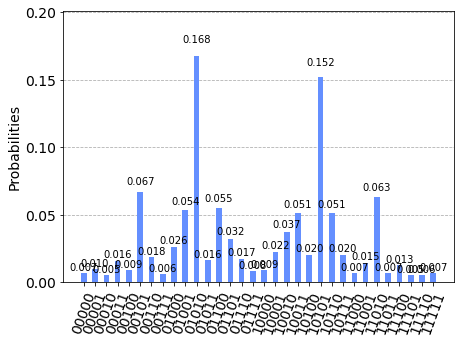

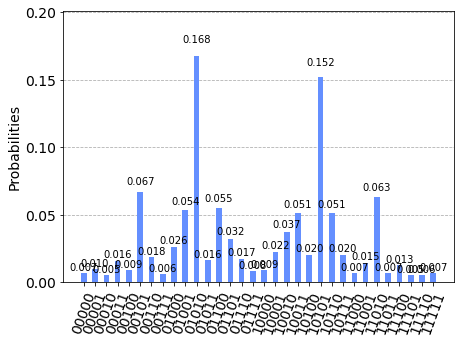

In [79]:
plot_histogram(filter_direct_recombined)

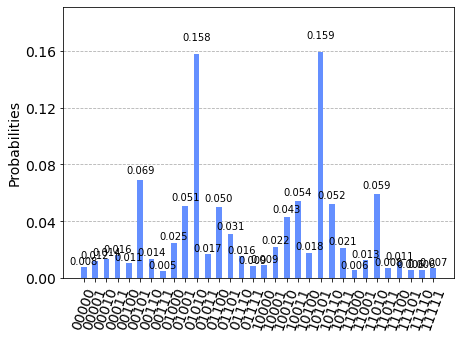

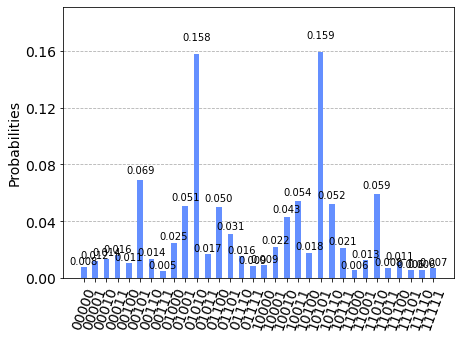

In [80]:
plot_histogram(new_dict)

In [41]:
filter_direct_recombined

{'00000': 0.006935902636841608,
 '01000': 0.025420097798545697,
 '00001': 0.009712645452524296,
 '01001': 0.05208033570950337,
 '00010': 0.005226700670433265,
 '01010': 0.16334334495853356,
 '00011': 0.01545097862584563,
 '01011': 0.015897774002306086,
 '10000': 0.008729979135740827,
 '11000': 0.006697619636245573,
 '10001': 0.02177485771196567,
 '11001': 0.014175513281045606,
 '10010': 0.036264614415778926,
 '11010': 0.06123900932817529,
 '10011': 0.05000378795738171,
 '11011': 0.006634985458441627,
 '00101': 0.06546611170037661,
 '01101': 0.03136475387502911,
 '00110': 0.017945728358369276,
 '01110': 0.01665862831539621,
 '00111': 0.00612816928881216,
 '01111': 0.007993499802344175,
 '10100': 0.019506851329775428,
 '11100': 0.012372665262549484,
 '10101': 0.1477424976367402,
 '11101': 0.004921111870021011,
 '10110': 0.049851310968873346,
 '11110': 0.005549181334796411,
 '10111': 0.019592158631329435,
 '11111': 0.006497105124589337,
 '00100': 0.008546522812370356,
 '01100': 0.05369021

In [42]:
filter_actual = filter_results(actual_dist, [0])

In [45]:
orign_qc_nomeas = QuantumCircuit.from_qasm_file("QAOA5q_nomeas.qasm")

In [46]:
# list of all possible measurement outcomes (bitstrings)
all_bits_5q = [ "".join(bits) for bits in itertools.product(["0","1"], repeat = 5) ]

In [47]:
actual_state = ml.get_statevector(orign_qc_nomeas)
actual_dist = { "".join(bits) : abs(amp)**2
                for bits, amp in zip(all_bits_5q, actual_state)
                if amp != 0 }

In [48]:
actual_dist

{'00000': 0.007053859412640273,
 '00001': 0.004726524422385898,
 '00010': 0.0024357597072877293,
 '00011': 0.01475918924081102,
 '00100': 0.004726524422385894,
 '00101': 0.06704352845719859,
 '00110': 0.01475918924081102,
 '00111': 0.003256936160782965,
 '01000': 0.016240348372834442,
 '01001': 0.05790699263044283,
 '01010': 0.17917017205066388,
 '01011': 0.014115777803086907,
 '01100': 0.05790699263044283,
 '01101': 0.0343952296516695,
 '01110': 0.014115777803086907,
 '01111': 0.007387197993469807,
 '10000': 0.007387197993469802,
 '10001': 0.014115777803086914,
 '10010': 0.03439522965166949,
 '10011': 0.0579069926304428,
 '10100': 0.014115777803086914,
 '10101': 0.17917017205066388,
 '10110': 0.0579069926304428,
 '10111': 0.01624034837283445,
 '11000': 0.003256936160782963,
 '11001': 0.014759189240811006,
 '11010': 0.06704352845719859,
 '11011': 0.004726524422385903,
 '11100': 0.014759189240811016,
 '11101': 0.0024357597072877375,
 '11110': 0.004726524422385909,
 '11111': 0.0070538594

In [54]:
#unopt

shots = 8192
job = execute(orign_qc, backend=noisy_simulator, noise_model = noise_model,shots=shots)
job_monitor(job)
res = job.result()

Job Status: job has successfully run


In [56]:
res_dict = res.get_counts()

In [57]:
new_dict = {}
for i in res_dict.keys():
    new_dict[i] = res_dict[i]/8192

In [83]:

#unopt

shots = 8192
job2 = execute(circuit, backend=noisy_simulator, noise_model = noise_model,shots=shots)
job_monitor(job2)
res2 = job2.result()

Job Status: job has successfully run


In [85]:
res_dict2 = res2.get_counts()

In [86]:
new_dict2 = {}
for i in res_dict2.keys():
    new_dict2[i] = res_dict2[i]/8192

In [87]:
new_dict2

{'000000': 0.0091552734375,
 '000001': 0.0140380859375,
 '010000': 0.008544921875,
 '010001': 0.0250244140625,
 '010010': 0.0369873046875,
 '010011': 0.0517578125,
 '010100': 0.0194091796875,
 '010101': 0.1551513671875,
 '010110': 0.0465087890625,
 '010111': 0.019775390625,
 '011000': 0.0067138671875,
 '011001': 0.0126953125,
 '011010': 0.0606689453125,
 '011011': 0.0072021484375,
 '011100': 0.0152587890625,
 '011101': 0.0064697265625,
 '011110': 0.0064697265625,
 '011111': 0.0045166015625,
 '000010': 0.013916015625,
 '000011': 0.01611328125,
 '000100': 0.011962890625,
 '000101': 0.0650634765625,
 '000110': 0.0152587890625,
 '000111': 0.0062255859375,
 '001000': 0.0224609375,
 '001001': 0.0545654296875,
 '001010': 0.1630859375,
 '001011': 0.01806640625,
 '001100': 0.0487060546875,
 '001101': 0.0291748046875,
 '001110': 0.0194091796875,
 '001111': 0.0096435546875}

In [90]:
orign_dict2 = filter_results(new_dict2, [0])

In [91]:
orign_dict2

{'00000': 0.0091552734375,
 '00001': 0.0140380859375,
 '10000': 0.008544921875,
 '10001': 0.0250244140625,
 '10010': 0.0369873046875,
 '10011': 0.0517578125,
 '10100': 0.0194091796875,
 '10101': 0.1551513671875,
 '10110': 0.0465087890625,
 '10111': 0.019775390625,
 '11000': 0.0067138671875,
 '11001': 0.0126953125,
 '11010': 0.0606689453125,
 '11011': 0.0072021484375,
 '11100': 0.0152587890625,
 '11101': 0.0064697265625,
 '11110': 0.0064697265625,
 '11111': 0.0045166015625,
 '00010': 0.013916015625,
 '00011': 0.01611328125,
 '00100': 0.011962890625,
 '00101': 0.0650634765625,
 '00110': 0.0152587890625,
 '00111': 0.0062255859375,
 '01000': 0.0224609375,
 '01001': 0.0545654296875,
 '01010': 0.1630859375,
 '01011': 0.01806640625,
 '01100': 0.0487060546875,
 '01101': 0.0291748046875,
 '01110': 0.0194091796875,
 '01111': 0.0096435546875}

In [64]:
def dict_to_list(dictionary, size):
    ret_list = []
    total = total_counts(dictionary)
    format_str = '{0:0' + str(size) + 'b}'
    for i in range(0, 2 ** size):
        binary = format_str.format(i)
        try:
            ret_list.append(dictionary[binary]/total)
        except:
            ret_list.append(0.0)
    return ret_list

def H_distance(p, q):
    # distance between p an d
    # p and q are np array probability distributions
    n = len(p)
    sum = 0.0
    for i in range(n):
        sum += (np.sqrt(p[i]) - np.sqrt(q[i]))**2
    result = (1.0 / np.sqrt(2.0)) * np.sqrt(sum)
    return result

In [67]:
def total_counts(dictionary):
    total = 0
    for value in dictionary.values():
        total += value
    return total

In [72]:
ideal = dict_to_list(actual_dist, 5)

In [70]:
pauli = dict_to_list(filter_direct_recombined, 5)

In [71]:
orign = dict_to_list(new_dict, 5)

In [92]:
orign2 = dict_to_list(orign_dict2, 5)

In [76]:
H_distance(ideal,ideal)

0.0

In [93]:
H_distance(orign2, ideal)

0.09552368927275055

In [77]:
H_distance(orign, ideal)

0.08704751935405523

In [78]:
H_distance(pauli, ideal)

0.06896081133377463

In [62]:
def naive_fix(dist):
    norm = sum( value for value in dist.values() if value >= 0 )
    return { bits : value / norm for bits, value in dist.items() if value >= 0 }

direct_recombined_dist = naive_fix(filter_direct_recombined)

def fidelity(dist):
    fidelity = sum( numpy.sqrt(actual_dist[bits] * dist[bits], dtype = complex)
                    for bits in all_bits
                    if actual_dist.get(bits) and dist.get(bits) )**2
    return fidelity.real if fidelity.imag == 0 else fidelity

In [63]:
direct_fidelity = fidelity(filter_direct_recombined)
likely_fidelity = fidelity(likely_recombined_dist)
full_circuit_fidelity = fidelity(full_circuit_dist)
print("'direct' distribution fidelity:", direct_fidelity)
print("'likely' distribution fidelity:", likely_fidelity)
print("full circuit fidelity:", full_circuit_fidelity)

'direct' distribution fidelity: 0
'likely' distribution fidelity: 0
full circuit fidelity: 0


In [37]:
# if qubits <= 5:
#     print()
#     print("actual probability distribution:")
#     for bits in all_bits:
#         try: print(bits, actual_dist[bits])
#         except: None

#     print()
#     print("'direct' recombined probability distribution:")
#     for bits in all_bits:
#         try: print(bits, direct_recombined_dist[bits])
#         except: None

#     print()
#     print("'likely' recombined probability distribution:")
#     for bits in all_bits:
#         try: print(bits, likely_recombined_dist[bits])
#         except: None

#     print()
#     print("full circuit probability distribution:")
#     for bits in all_bits:
#         try: print(bits, full_circuit_dist[bits])
#         except: None

# print()

def naive_fix(dist):
    norm = sum( value for value in dist.values() if value >= 0 )
    return { bits : value / norm for bits, value in dist.items() if value >= 0 }

direct_recombined_dist = naive_fix(direct_recombined_dist)

def fidelity(dist):
    fidelity = sum( numpy.sqrt(actual_dist[bits] * dist[bits], dtype = complex)
                    for bits in all_bits
                    if actual_dist.get(bits) and dist.get(bits) )**2
    return fidelity.real if fidelity.imag == 0 else fidelity

direct_fidelity = fidelity(direct_recombined_dist)
likely_fidelity = fidelity(likely_recombined_dist)
full_circuit_fidelity = fidelity(full_circuit_dist)
print("'direct' distribution fidelity:", direct_fidelity)
print("'likely' distribution fidelity:", likely_fidelity)
print("full circuit fidelity:", full_circuit_fidelity)




'direct' distribution fidelity: 0.9641783427074918
'likely' distribution fidelity: 0.9542470241232749
full circuit fidelity: 0.9999706627626875
